## Mandatory Assignment 2
### Machine Learning 

Antonia Strobl - 167298
Nicola Friedrich - 167278
Johanna Daniel - 167680

Question 1

Load relevant libraries, load and explore the data

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate

import seaborn as sns


In [24]:
# Load the dataset
data = pd.read_csv("data.csv")

# Display the first few rows of the dataset to understand its structure
print(data.head())

     Unnamed: 0  Addthis  Bebo  Blogcatalog  Blogger  Buddymedia  Cnet  \
0  dmp923122274        0     0            2        0           0     3   
1  dmp458034174        0     3            0        0           0     0   
2  dmp364043571        0     2            0        0           0     0   
3  dmp461339655        0     0            0        0           0     0   
4  dmp549691332        0     0            0        0           0     5   

   Conduit  Customerlobby  Delicious  ...  Vimeo Vocus  Wetpaint  Wordpress  \
0        6              0          0  ...      0     0         0          4   
1        1              0          0  ...      0     0         0         12   
2        0              0          2  ...      0     0         0         11   
3        0              0          0  ...      0     0         0          6   
4        7              0          0  ...      0     0         1          0   

   Xanga  Yelp  Yfrog  Youtube  Yuku  Click  
0      0     0      1        0    

In [25]:
# Step 2: Data Exploration and Cleaning
# Check for missing values

#print names of non-numeric columns
# Select non-numeric columns
non_numeric_cols = data.select_dtypes(exclude='number').columns.tolist()

# Print names of non-numeric columns
# print("Non-numeric columns:", non_numeric_cols)

#numer of values that are Error: value not found
# print(data['Diigo'].value_counts()['Error: value not found'])

# Replace the 'Error: value not found' values with NaN
data['Diigo'].replace('Error: value not found', pd.NA, inplace=True)

# Convert the Diigo column to a numeric data type
data['Diigo'] = pd.to_numeric(data['Diigo'])

# Check for outliers
#print(data.describe())

#number of nan values total
# print(data.isnull().sum().sum())
# data = data.select_dtypes(include='number')

#find outliers where click column is greater than 1000 or less than 0
#print(data[(data['Click'] > 1000) | (data['Click'] < 0)])

#plot histogram of click column
#data['Click'].plot(kind='hist')

#drop djago column
data = data.drop('Diigo', axis=1)

2. Develop supervised machine-learning classifiers as mentioned above, using an 80/20 split for training to test sets. Use the confusion matrix, precision, recall, f1, support and accuracy to compare the performance of the algorithms. Apart from that, also carry out Cross-Validation.

In [51]:
# get sum of impressions per column
data.sum()
# drop non-numeric columns
data = data.select_dtypes(include='number')

# # create new row to data with sum of each column
# data.loc['Total'] = data.sum()

# # get how many times each column has a value greater 0
# data.gt(0).sum()

# # create new row to add how many times each column has a value greater than 0
# data.loc['Positive'] = data.gt(0).sum()

# # get last 5 rows
# # put last two rows in seperate df
# data2 = data.tail(2)

# create df with sum of each column and how many times each column has a value greater than 0
data2 = pd.DataFrame(data.sum(), columns=['Sum'])
data2['Positive'] = data.gt(0).sum()

# add ratio of positive values to data2
data2['Ratio'] = data2['Positive'] / data2['Sum']

# sort by positive
data2 = data2.sort_values(by='Positive', ascending=True)

data2


,Sum,Positive,Ratio
Buddymedia,0,0,NaN
Customerlobby,49,4,0.081633
Ubertwitter,319,19,0.059561
Docs,607,35,0.057661
Twine,3030,169,0.055776
...,...,...,...
Conduit,260543,3559,0.013660
Cnet,240072,3647,0.015191
Myspace,387176,3721,0.009611
Facebook,673388,3767,0.005594


## SVM Classifier

In [26]:
#pip install -U imbalanced-learn

In [54]:
# split in 80/20 train/test
X = data.drop('Click', axis=1)
# drop non-numeric values
X = X.select_dtypes(include='number')
y = data['Click']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [56]:
# Train and evaluate SVM classifier without oversampling or undersampling
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_y_pred = svm_classifier.predict(X_test)

print("Support Vector Machine (SVM) Performance without Oversampling or Undersampling:")
print(classification_report(y_test, svm_y_pred))

Support Vector Machine (SVM) Performance without Oversampling or Undersampling:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1751
           1       0.00      0.00      0.00       248
        1236       0.00      0.00      0.00         1
       19755       0.00      0.00      0.00         1

    accuracy                           0.88      2001
   macro avg       0.22      0.25      0.23      2001
weighted avg       0.77      0.88      0.82      2001



/Users/simonstohrer/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/simonstohrer/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/simonstohrer/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Because of the imbalance of the data set, 1s are not identified correctly. We can try over and undersampling to prevent this issue.

In [57]:
# Oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Train and evaluate SVM classifier with oversampled data
svm_classifier_over = SVC()
svm_classifier_over.fit(X_train_over, y_train_over)
svm_y_pred_over = svm_classifier_over.predict(X_test)

print("Support Vector Machine (SVM) Performance with Oversampling:")
print(classification_report(y_test, svm_y_pred_over))

# Train and evaluate SVM classifier with undersampled data
svm_classifier_under = SVC()
svm_classifier_under.fit(X_train_under, y_train_under)
svm_y_pred_under = svm_classifier_under.predict(X_test)

print("Support Vector Machine (SVM) Performance with Undersampling:")
print(classification_report(y_test, svm_y_pred_under))


Support Vector Machine (SVM) Performance with Oversampling:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1751
           1       0.12      1.00      0.22       248
        1236       0.00      0.00      0.00         1
       19755       0.00      0.00      0.00         1

    accuracy                           0.12      2001
   macro avg       0.03      0.25      0.06      2001
weighted avg       0.02      0.12      0.03      2001



/Users/simonstohrer/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/simonstohrer/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/simonstohrer/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

Support Vector Machine (SVM) Performance with Undersampling:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1751
           1       0.12      1.00      0.22       248
        1236       0.00      0.00      0.00         1
       19755       0.00      0.00      0.00         1

    accuracy                           0.12      2001
   macro avg       0.03      0.25      0.06      2001
weighted avg       0.02      0.12      0.03      2001



/Users/simonstohrer/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/simonstohrer/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/simonstohrer/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

We can see that while oversampling was not helpful in improving precision, recall and f1-score, undersampling was. It is mportant to note that undersampling can lead to loss of important information

In [86]:
#Preparing cross validation
# Define function to display cross-validation results
def display_cv_results(cv_results):
    print("Cross-Validation Results:")
    print("Accuracy:", cv_results['test_accuracy'])
    print("Precision:", cv_results['test_precision'])
    print("Recall:", cv_results['test_recall'])
    print("F1-score:", cv_results['test_f1'])
    

# Define function to display mean and standard deviation of cross-validation results
def display_cv_summary(cv_results):
    print("\nMean Cross-Validation Scores:")
    print("Accuracy:", cv_results['test_accuracy'].mean())
    print("Precision:", cv_results['test_precision'].mean())
    print("Recall:", cv_results['test_recall'].mean())
    print("F1-score:", cv_results['test_f1'].mean())

In [87]:
print("Support Vector Machine (SVM) Performance with undersampling:")
display_classification_report(y_test, svm_y_pred_under)

# Perform cross-validation for SVM classifier
svm_cv_results = cross_validate(svm_classifier_under, X, y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
display_cv_results(svm_cv_results)
display_cv_summary(svm_cv_results)


Support Vector Machine (SVM) Performance with undersampling:
Confusion Matrix:
 [[1455  306]
 [  28  211]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90      1761
           1       0.41      0.88      0.56       239

    accuracy                           0.83      2000
   macro avg       0.69      0.85      0.73      2000
weighted avg       0.91      0.83      0.86      2000



/Users/antoniastrobl/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/antoniastrobl/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/antoniastrobl/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-Validation Results:
Accuracy: [0.877  0.8765 0.8765 0.9095 0.8765]
Precision: [0.    0.    0.    0.875 0.   ]
Recall: [0.         0.         0.         0.31174089 0.        ]
F1-score: [0.         0.         0.         0.45970149 0.        ]

Mean Cross-Validation Scores:
Accuracy: 0.8831999999999999
Precision: 0.175
Recall: 0.062348178137651825
F1-score: 0.09194029850746269


/Users/antoniastrobl/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Random Forest Classifier

In [52]:
#Random Forest Classifier
# Train and evaluate Random Forest 
rf_classifier = RandomForestClassifier(random_state=42)

In [53]:
# Train and evaluate Random Forest classifier with 80/20 split
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

print("Random Forest Performance with 80/20 Split:")
display_classification_report(y_test, rf_y_pred)

# Perform cross-validation for Random Forest classifier
rf_cv_results = cross_validate(rf_classifier, X, y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
display_cv_results(rf_cv_results)
display_cv_summary(rf_cv_results)


ValueError: could not convert string to float: 'dmp437802502'

Accuracy:
Both classifiers achieve similar accuracy scores, with SVM slightly outperforming Random Forest.
Precision:
Random Forest achieves significantly higher precision compared to SVM.
Recall:
Both classifiers have low recall scores, indicating they struggle to correctly identify positive instances (users who clicked on advertisements).
F1-score:
SVM achieves a higher F1-score compared to Random Forest, but both classifiers have low F1-scores due to the low recall.
Overall, while Random Forest achieves higher precision, its recall and F1-score are lower compared to SVM. SVM, on the other hand, achieves a slightly higher recall and F1-score, albeit with lower precision.

2. Next, create a function to find the five most influential features and develop a function to plot the most significant predictors by considering the size of their coefficients.

In [115]:

def identify_top_features(classifier, feature_names, n=5, classifier_type='SVM'):
    if classifier_type == 'SVM':
        if hasattr(classifier, 'coef_'):
            coefficients = classifier.coef_.ravel()
            absolute_coefficients = abs(coefficients)
            top_indices = absolute_coefficients.argsort()[-n:][::-1]
            top_features = [feature_names[i] for i in top_indices]
            top_coefficients = coefficients[top_indices]
            return top_features, top_coefficients
        else:
            print("Coefficient information not available for the given classifier.")
            return None, None
    elif classifier_type == 'Random Forest':
        if hasattr(classifier, 'feature_importances_'):
            feature_importances = classifier.feature_importances_
            top_indices = feature_importances.argsort()[-n:][::-1]
            top_features = [feature_names[i] for i in top_indices]
            top_coefficients = feature_importances[top_indices]
            return top_features, top_coefficients
        else:
            print("Feature importance information not available for the given classifier.")
            return None, None
    else:
        print("Invalid classifier type. Supported types: 'SVM', 'Random Forest'.")
        return None, None

def plot_top_features(top_features, top_coefficients, n=5, classifier_type='SVM'):
    if top_features is not None and top_coefficients is not None:
        plt.figure(figsize=(10, 6))
        plt.barh(top_features, top_coefficients, color='skyblue')
        if classifier_type == 'SVM':
            plt.xlabel('Coefficient Magnitude')
        elif classifier_type == 'Random Forest':
            plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.title('Top {} Predictors ({})'.format(n, classifier_type))
        plt.gca().invert_yaxis()
        plt.show()
    else:
        print("No top features and coefficients available.")


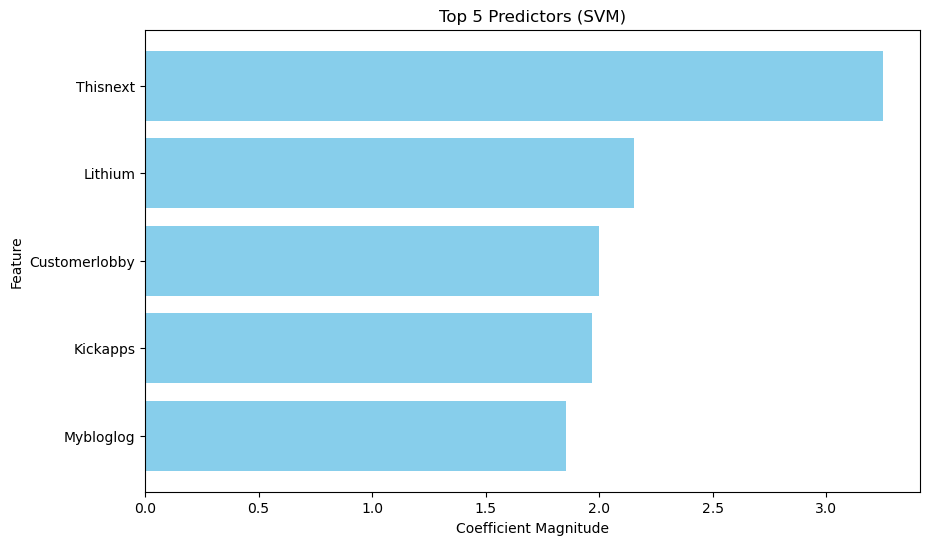

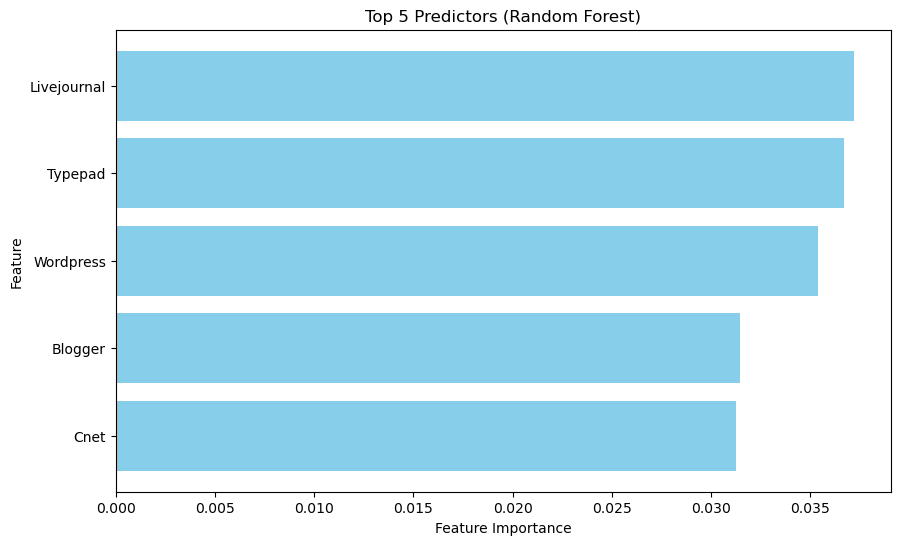

In [116]:
# Plot top features for SVM classifier
top_features_svm, top_coefficients_svm = identify_top_features(svm_classifier, X.columns, n=5, classifier_type='SVM')
plot_top_features(top_features_svm, top_coefficients_svm, n=5, classifier_type='SVM')

# Plot top features for Random Forest classifier
top_features_rf, top_importances_rf = identify_top_features(rf_classifier, X.columns, n=5, classifier_type='Random Forest')
plot_top_features(top_features_rf, top_importances_rf, n=5, classifier_type='Random Forest')


When only choosing a few channels, the most influential ones shoud be chosen. 

Vizualize relationship

In [137]:
def feature_click_counts(top_features, X, clicks_col='Click'):
    feature_counts = {}
    for feature in top_features:
        feature_total_count = X[feature].sum()
        non_zero_clicks = X[X[feature] != 0][clicks_col].sum()
        click_ratio = non_zero_clicks / feature_total_count if feature_total_count != 0 else 0
        feature_counts[feature] = {'Total Count': feature_total_count, 'Clicks': non_zero_clicks, 'Click Ratio': click_ratio}
    
    feature_counts_df = pd.DataFrame.from_dict(feature_counts, orient='index')
    return feature_counts_df



In [140]:
feature_counts_table_rf = feature_click_counts(top_features_rf, data)

# Print the resulting table
print(feature_counts_table_rf)

feature_counts_table_svm = feature_click_counts(top_features_svm, data)

# Print the resulting table
print(feature_counts_table_svm)

             Total Count  Clicks  Click Ratio
Livejournal        16015     584     0.036466
Typepad             9558     517     0.054091
Wordpress          21769     595     0.027332
Blogger            28237     488     0.017282
Cnet               19504     646     0.033121
               Total Count  Clicks  Click Ratio
Thisnext              2019     447     0.221397
Lithium                189      39     0.206349
Customerlobby            2       2     1.000000
Kickapps               442      87     0.196833
Mybloglog             3030     402     0.132673


"Thisnext" and "Lithium" have grat Click Ratio, so they should be selected when financially choosing channels